In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data_gen = ImageDataGenerator(rotation_range = 20,  # 最大旋轉幾度
                          width_shift_range = 0.1,
                          height_shift_range = 0.1,
                              # width_shift_range, height_shift_range 是圖片水平和縱向的位移
                              # 如果 為 float 且 小於1
                                  # 則代表有可能的位移百分比 
                                  # 1.0 就代表圖片可能會位移到完全不見
                              # 如果是 int
                                  # 有可能的位移 pixel

                          horizontal_flip = False,
                          vertical_flip = False,
                          zoom_range = [0.95, 1.05], # 放大縮小範圍
                          fill_mode = 'constant',
                              # 當平移時 要怎麼填空白處
                              #  {"constant", "nearest", "reflect" or "wrap"} 
                                  # 'constant' : 固定的顏色  由 cval 指定顏色 kkkkkkkk|abcd|kkkkkkkk (cval=k)
                                  # 'nearest'  : 使用最靠近的顏色  aaaaaaaa|abcd|dddddddd
                                  # 'reflect'  : abcddcba|abcd|dcbaabcd
                                  # 'wrap'     : abcdabcd|abcd|abcdabcd
                          cval = 256,  
                              # 如果 fill_mode=="constant" 外面要填的顏色
                              # 0 是 黑色
                              # 255 是白色
                          data_format = 'channels_last'
                              # channels_last 形狀會是  (samples, height, width, channels)
                              # channels_first 形狀會是 (samples, channels, height, width)
                        )

# 複製用
# data_gen = ImageDataGenerator(rotation_range = 20,
#                           width_shift_range = 0.1,
#                           height_shift_range = 0.1,
#                           horizontal_flip = False,
#                           vertical_flip = False,
#                           fill_mode = 'constant',
#                           cval = 0,  
#                           data_format = 'channels_last'
#                         )

In [ ]:
# datagen.fit(test_pic)
# 可以想成產出標準化的圖片 需要先計算的東西
# fit 只有當 featurewise_center or featurewise_std_normalization or zca_whitening 設成True的時候才需要做

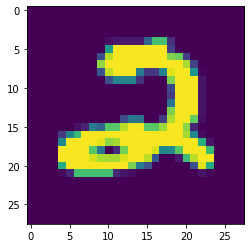

In [3]:
test_data = pd.read_csv("./input/test.csv")
test_pic = test_data.iloc[:,:].values.reshape(-1,28,28,1)
plt.imshow(test_pic[0])

# x = test_pic[0].reshape((1,)+(28,28,1))
x = test_pic

In [4]:
i = 0
pic_gen = data_gen.flow(x, batch_size = 1, save_to_dir='./ImageDataGenerator_pic/', save_prefix="number", save_format='jpeg') 
for batch in pic_gen :
#     print(batch.shape)
    i+=1
    if i > 20 :
        break
    

In [ ]:
# tensorflow training 時如何使用

# # TF <= 2.0
# # fits the model on batches with real-time data augmentation:
# model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
#                     steps_per_epoch=len(x_train) // 32, epochs=epochs)

# #TF >= 2.1
# model.fit(datagen.flow(x_train, y_train, batch_size=32),
#                     steps_per_epoch=len(x_train) // 32, epochs=epochs)